In [1]:
import pandas as pd 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('World_Billionaire_2024.csv')
df.head(2743)

RANK                  COMPANY            EXECUTIVE NAME  NET WORTH  \
0     RANK                  COMPANY            EXECUTIVE NAME  NET WORTH   
1        1            Tesla, SpaceX                 Elon Musk   $212.3 B   
2        2                   Amazon                Jeff Bezos   $203.5 B   
3        3                     LVMH  Bernard Arnault & family   $194.3 B   
4        4                 Facebook           Mark Zuckerberg   $175.9 B   
...    ...                      ...                       ...        ...   
2738  2738                Machinery                  Song Fei     $1.0 B   
2739  2739                Packaging       Li Xiaohua & family     $1.0 B   
2740  2740        Electric scooters             Qian Jinghong     $1.0 B   
2741  2741  Lithium-ion battery cap                 Li Jianli     $0.9 B   
2742  2742          music, sneakers                Kanye West     $0.4 B   

            COUNTRY  
0           COUNTRY  
1     United States  
2     United States  
3            France  
4     United States  
...             ...  
2738          China  
2739          China  
2740          China  
2741          China  
2742  United States  

[2743 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RANK            2743 non-null   object
 1   COMPANY         2743 non-null   object
 2   EXECUTIVE NAME  2743 non-null   object
 3   NET WORTH       2743 non-null   object
 4   COUNTRY         2743 non-null   object
dtypes: object(5)
memory usage: 107.3+ KB


# 1. Top Billionaires by Country

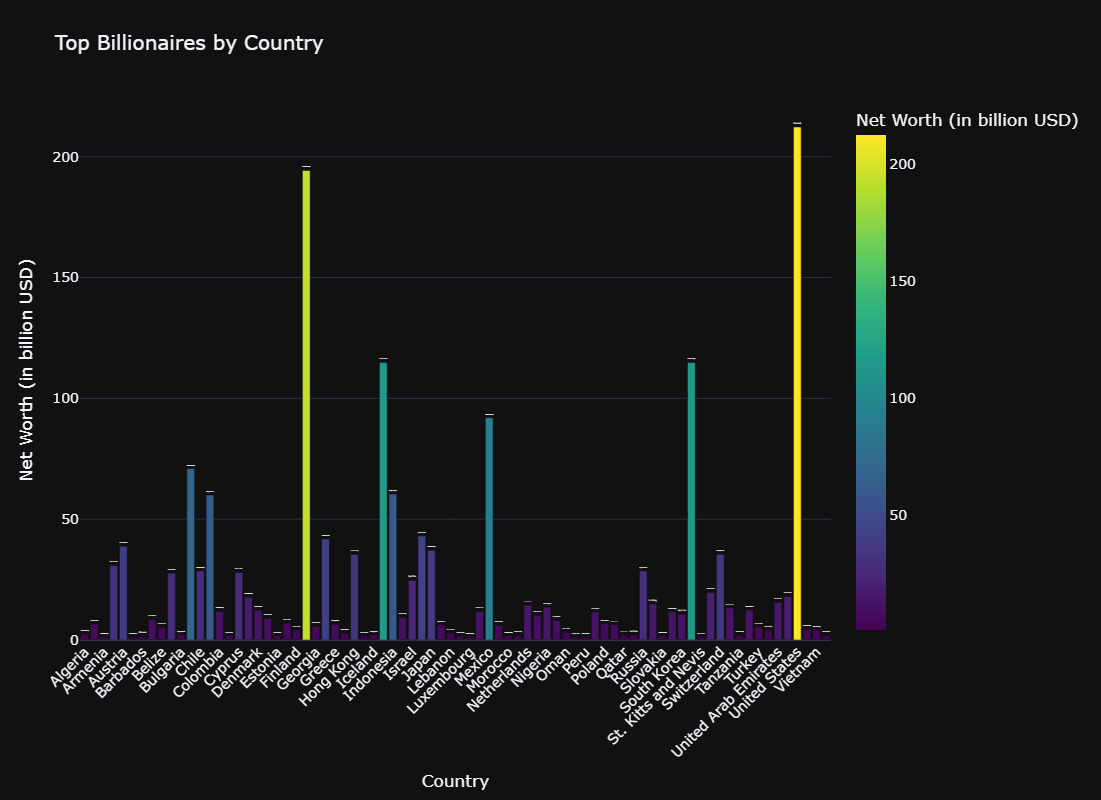

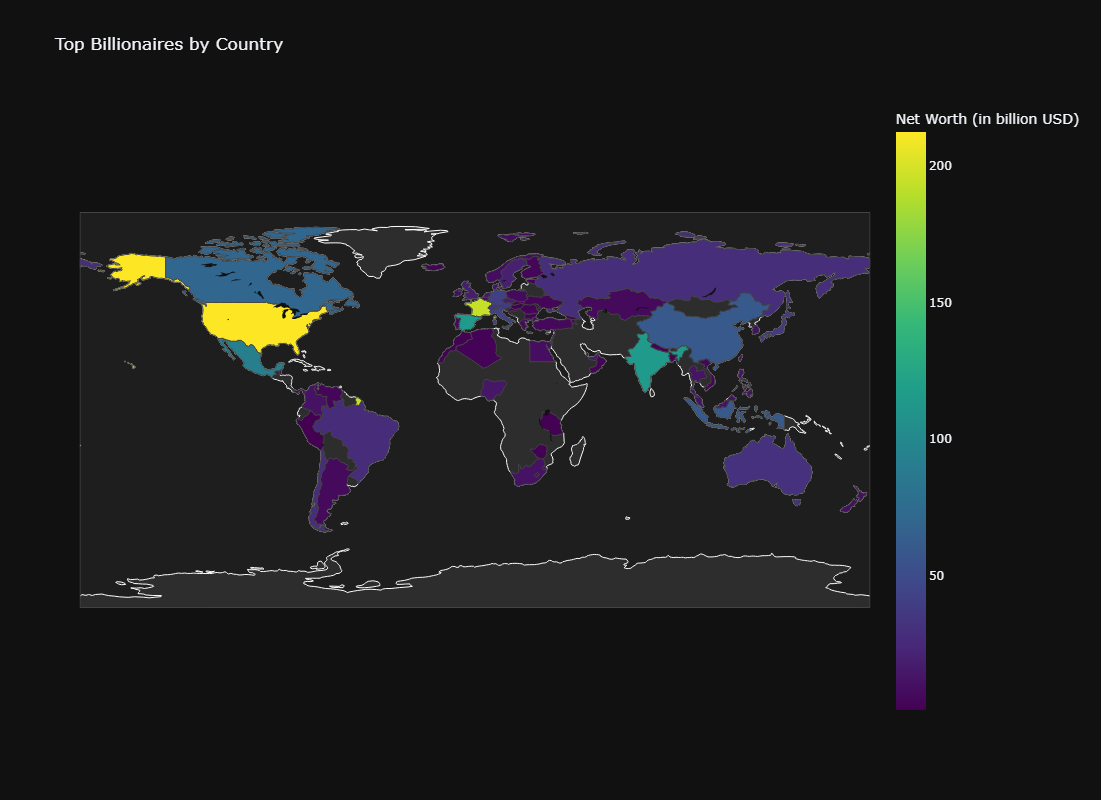

In [4]:

# Function to clean and convert the NET WORTH column
def clean_net_worth(value):
    if isinstance(value, str):
        # Remove commas, dollar signs, and the ' B' suffix, then convert to float
        value = value.replace(',', '').replace('$', '').replace(' B', '').strip()
        try:
            return float(value)
        except ValueError:
            return None
    elif isinstance(value, float):
        return value
    else:
        return None

# Apply the cleaning function to the NET WORTH column
df['NET WORTH'] = df['NET WORTH'].apply(clean_net_worth)

# Drop rows with missing or invalid NET WORTH values
df = df.dropna(subset=['NET WORTH'])

# Find the top billionaire in each country by net worth
top_billionaires_by_country = df.loc[df.groupby('COUNTRY')['NET WORTH'].idxmax()]

# Create a bar chart with Plotly Express
fig_bar = px.bar(top_billionaires_by_country, x='COUNTRY', y='NET WORTH', text='EXECUTIVE NAME',
                 title='Top Billionaires by Country',
                 labels={'NET WORTH': 'Net Worth (in billion USD)', 'COUNTRY': 'Country'},
                 color='NET WORTH',
                 color_continuous_scale='Viridis',  # Dark color scheme for dark mode
                 template='plotly_dark',  # Dark mode template
                 height=800,  # Increase chart height
                 width=1200)  # Increase chart width

# Update the layout for better readability
fig_bar.update_layout(xaxis_title='Country',
                      yaxis_title='Net Worth (in billion USD)',
                      xaxis_tickangle=-45,
                      showlegend=False,
                      font=dict(size=14))

# Add value labels on the bars
fig_bar.update_traces(texttemplate='%{text}', textposition='outside')

# Show the bar chart
fig_bar.show()

# Create a map with Plotly Express
fig_map = px.choropleth(top_billionaires_by_country, locations='COUNTRY', locationmode='country names',
                        color='NET WORTH',
                        hover_name='EXECUTIVE NAME',
                        hover_data={'COUNTRY': False, 'NET WORTH': True, 'EXECUTIVE NAME': True},
                        title='Top Billionaires by Country',
                        labels={'NET WORTH': 'Net Worth (in billion USD)'},
                        color_continuous_scale='Viridis',  # Dark color scheme for dark mode
                        template='plotly_dark',  # Dark mode template
                        height=800,  # Increase chart height
                        width=1200)  # Increase chart width

# Update the layout for better readability
fig_map.update_geos(showcoastlines=True, coastlinecolor='White',
                    showland=True, landcolor='rgba(45, 45, 45, 1)',
                    showocean=True, oceancolor='rgba(30, 30, 30, 1)')

# Show the map
fig_map.show()

# 2. Net Worth Distribution

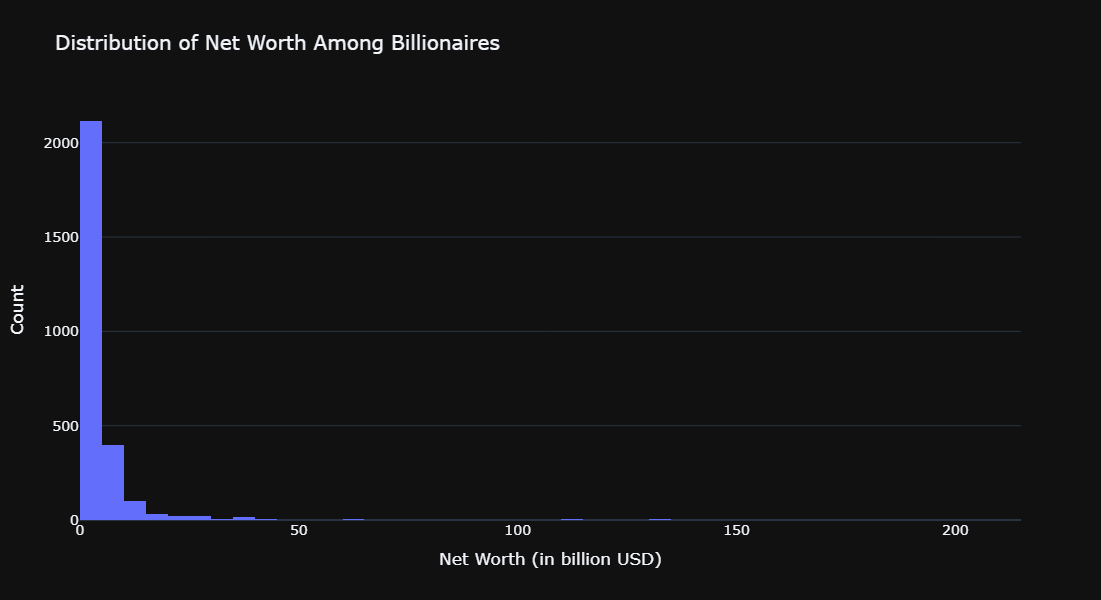

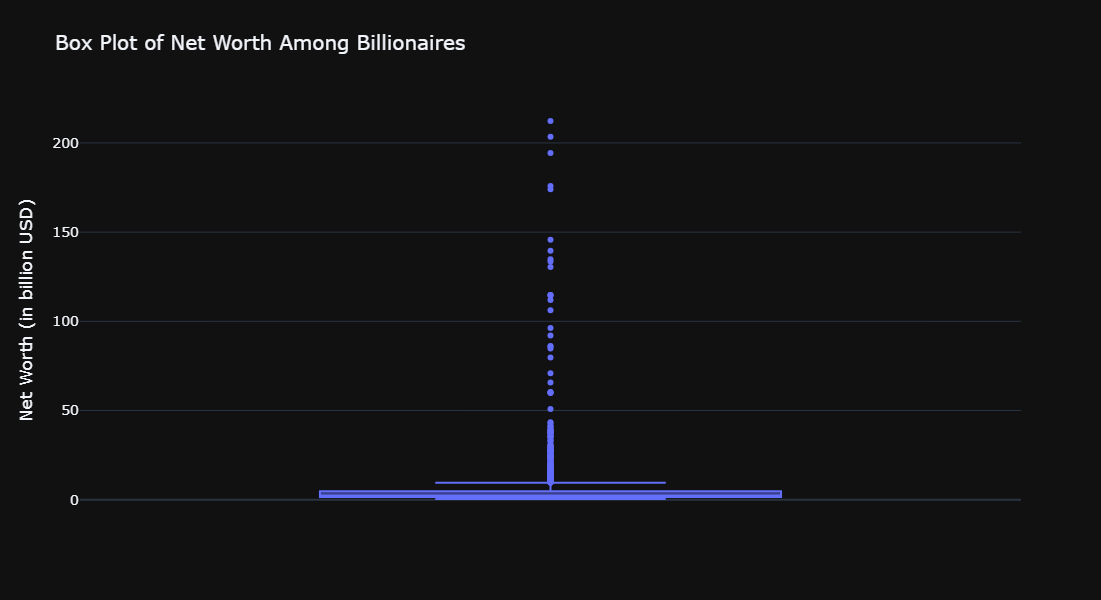

In [5]:
# Function to clean and convert the NET WORTH column
def clean_net_worth(value):
    if isinstance(value, str):
        # Remove commas, dollar signs, and the ' B' suffix, then convert to float
        value = value.replace(',', '').replace('$', '').replace(' B', '').strip()
        try:
            return float(value)
        except ValueError:
            return None
    elif isinstance(value, float):
        return value
    else:
        return None

# Apply the cleaning function to the NET WORTH column
df['NET WORTH'] = df['NET WORTH'].apply(clean_net_worth)

# Drop rows with missing or invalid NET WORTH values
df = df.dropna(subset=['NET WORTH'])

# Create a histogram for net worth distribution
fig_hist = px.histogram(df, x='NET WORTH',
                        title='Distribution of Net Worth Among Billionaires',
                        labels={'NET WORTH': 'Net Worth (in billion USD)'},
                        template='plotly_dark',  # Dark mode template
                        nbins=80,  # Number of bins
                        height=600,  # Chart height
                        width=800)  # Chart width

# Update the layout for better readability
fig_hist.update_layout(xaxis_title='Net Worth (in billion USD)',
                       yaxis_title='Count',
                       font=dict(size=14))

# Show the histogram
fig_hist.show()

# Create a box plot for net worth distribution
fig_box = px.box(df, y='NET WORTH',
                 title='Box Plot of Net Worth Among Billionaires',
                 labels={'NET WORTH': 'Net Worth (in billion USD)'},
                 template='plotly_dark',  # Dark mode template
                 height=600,  # Chart height
                 width=800)  # Chart width

# Update the layout for better readability
fig_box.update_layout(yaxis_title='Net Worth (in billion USD)',
                      font=dict(size=14))

# Show the box plot
fig_box.show()

# 3. Company Analysis

## Determine which sector have the most billionaires.

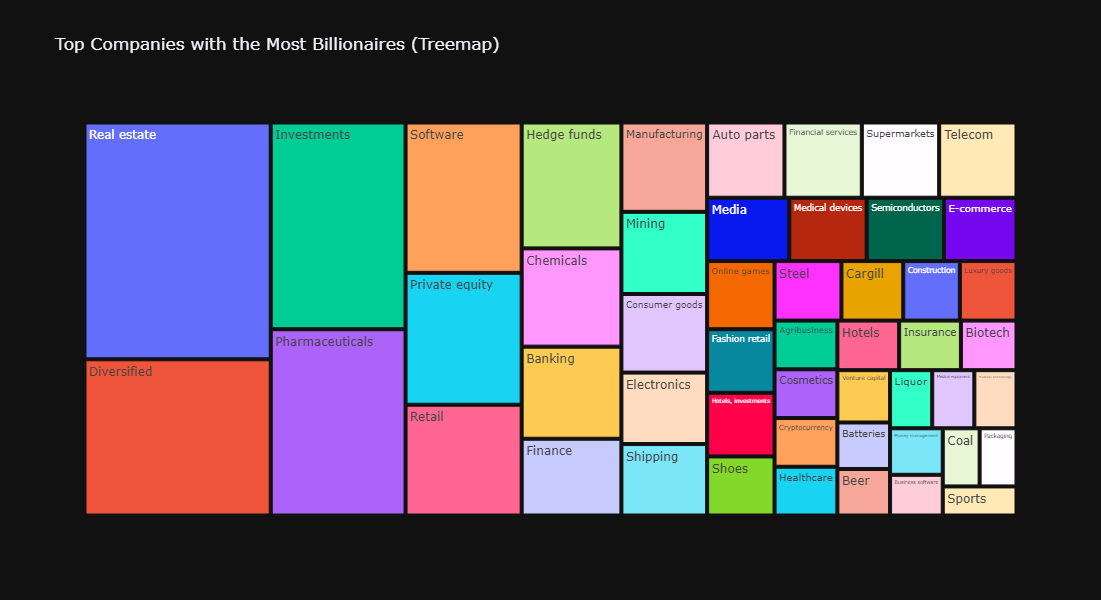

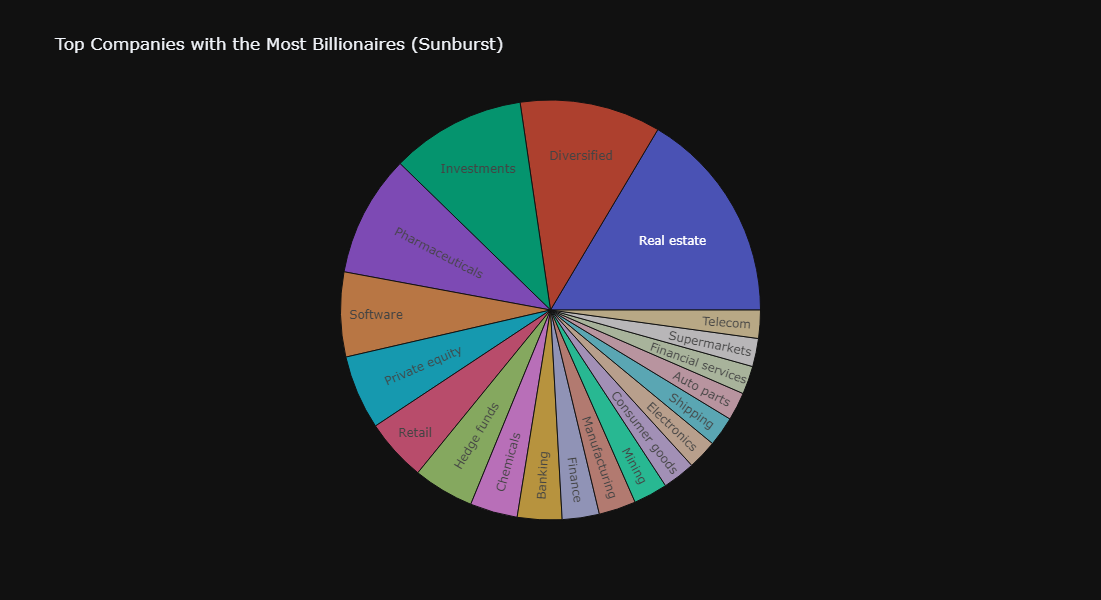

In [6]:

# Function to clean and convert the NET WORTH column
def clean_net_worth(value):
    if isinstance(value, str):
        # Remove commas, dollar signs, and the ' B' suffix, then convert to float
        value = value.replace(',', '').replace('$', '').replace(' B', '').strip()
        try:
            return float(value)
        except ValueError:
            return None
    elif isinstance(value, float):
        return value
    else:
        return None

# Apply the cleaning function to the NET WORTH column
df['NET WORTH'] = df['NET WORTH'].apply(clean_net_worth)

# Drop rows with missing or invalid NET WORTH values
df = df.dropna(subset=['NET WORTH'])

# Determine which companies have the most billionaires
company_billionaires = df['COMPANY'].value_counts().reset_index()
company_billionaires.columns = ['COMPANY', 'Billionaire Count']

# Sort companies by the number of billionaires (optional)
company_billionaires = company_billionaires.sort_values(by='Billionaire Count', ascending=False)

# Prepare data for Treemap (top 50 companies)
top_companies_treemap = company_billionaires.head(50)

# Create a Treemap for the top companies
fig_treemap = px.treemap(top_companies_treemap, path=['COMPANY'], values='Billionaire Count',
                         title='Top Companies with the Most Billionaires (Treemap)',
                         template='plotly_dark',  # Dark mode template
                         height=600)  # Chart height

# Show the Treemap
fig_treemap.show()

# Prepare data for Sunburst (top 20 companies for better readability)
top_companies_sunburst = company_billionaires.head(20)

# Create a Sunburst chart for the top companies
fig_sunburst = px.sunburst(top_companies_sunburst, path=['COMPANY'],
                           values='Billionaire Count',
                           title='Top Companies with the Most Billionaires (Sunburst)',
                           template='plotly_dark',  # Dark mode template
                           height=600)  # Chart height

# Show the Sunburst chart
fig_sunburst.show()

# 4. Country-wise Total Net Worth

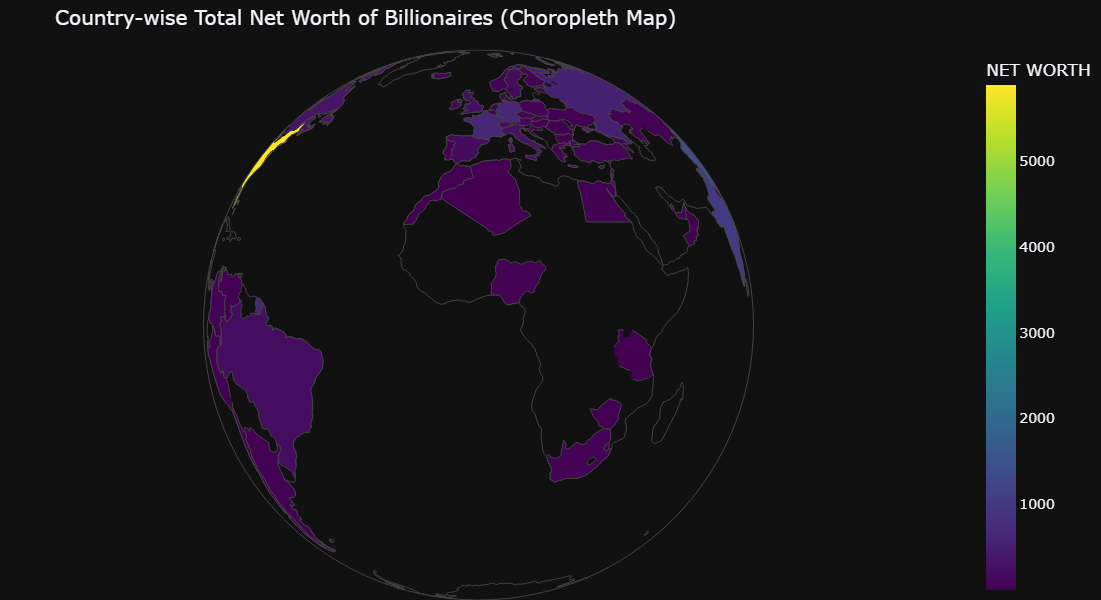

In [7]:

# Function to clean and convert the NET WORTH column
def clean_net_worth(value):
    if isinstance(value, str):
        # Remove commas, dollar signs, and the ' B' suffix, then convert to float
        value = value.replace(',', '').replace('$', '').replace(' B', '').strip()
        try:
            return float(value)
        except ValueError:
            return None
    elif isinstance(value, float):
        return value
    else:
        return None

# Apply the cleaning function to the NET WORTH column
df['NET WORTH'] = df['NET WORTH'].apply(clean_net_worth)

# Drop rows with missing or invalid NET WORTH values
df = df.dropna(subset=['NET WORTH'])

# Calculate total net worth by country
country_net_worth = df.groupby('COUNTRY')['NET WORTH'].sum().reset_index()

# Sort countries by total net worth (optional)
country_net_worth = country_net_worth.sort_values(by='NET WORTH', ascending=False)

# Calculate number of billionaires by country
num_billionaires = df.groupby('COUNTRY').size().reset_index(name='Number of Billionaires')

# Merge number of billionaires with country net worth data
country_net_worth = pd.merge(country_net_worth, num_billionaires, on='COUNTRY')

# Create a Choropleth map for country-wise total net worth
fig_choropleth = px.choropleth(country_net_worth, 
                               locations='COUNTRY',
                               locationmode='country names',
                               color='NET WORTH',
                               hover_name='COUNTRY',
                               hover_data={'COUNTRY': True, 'NET WORTH': ':,.2f', 'Number of Billionaires': True},
                               title='Country-wise Total Net Worth of Billionaires (Choropleth Map)',
                               color_continuous_scale='Viridis',  # Color scale
                               template='plotly_dark')  # Dark mode template

# Update the layout for better readability
fig_choropleth.update_geos(projection_type="orthographic")  # Choose projection type
fig_choropleth.update_layout(height=600,  # Chart height
                             margin={"r":0,"t":50,"l":0,"b":0},  # Margin settings
                             font=dict(size=14))  # Font size

# Show the Choropleth map
fig_choropleth.show()

# 5. Rank Analysis

## Examine the relationship between rank and net worth.
## scatter plots to visualize any patterns or correlations between a billionaire's rank and their net worth.

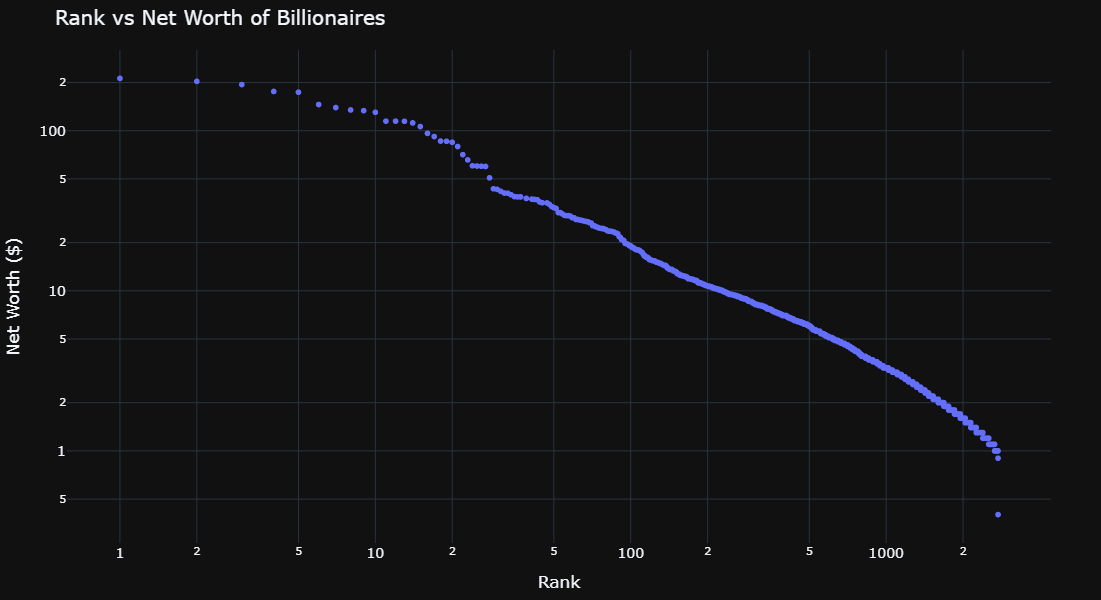

In [8]:
# Function to clean and convert the NET WORTH column
def clean_net_worth(value):
    if isinstance(value, str):
        # Remove commas, dollar signs, and the ' B' suffix, then convert to float
        value = value.replace(',', '').replace('$', '').replace(' B', '').strip()
        try:
            return float(value)
        except ValueError:
            return None
    elif isinstance(value, float):
        return value
    else:
        return None

# Apply the cleaning function to the NET WORTH column
df['NET WORTH'] = df['NET WORTH'].apply(clean_net_worth)

# Drop rows with missing or invalid RANK or NET WORTH values
df = df.dropna(subset=['RANK', 'NET WORTH'])

# Convert RANK to numeric (if not already numeric)
df['RANK'] = pd.to_numeric(df['RANK'], errors='coerce')

# Create a scatter plot for Rank vs Net Worth
fig_scatter = px.scatter(df, 
                         x='RANK', 
                         y='NET WORTH',
                         hover_name='COMPANY',  # Optional: Show company name on hover
                         title='Rank vs Net Worth of Billionaires',
                         labels={'RANK': 'Rank', 'NET WORTH': 'Net Worth ($)'},
                         template='plotly_dark')  # Dark mode template

# Update layout for better readability
fig_scatter.update_layout(xaxis_type='log',  # Logarithmic scale for rank (optional)
                          yaxis_type='log',  # Logarithmic scale for net worth (optional)
                          height=600,  # Chart height
                          margin={"r":50,"t":50,"l":50,"b":50},  # Margin settings
                          font=dict(size=14))  # Font size

# Show the scatter plot
fig_scatter.show()

# *THANK YOU*.....